# [직무능력 평가]
차원축소 및 주성분 탐색을 위해 주성분 분석을 실시하고 결과를 해석하시오.

In [3]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

import statsmodels.api as sm

#경고창 제거
import warnings
warnings.filterwarnings('ignore')

#한글 적용
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
mpl.rc('font',family= 'Malgun Gothic')
font_manager.get_fontconfig_fonts()
fontname = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontname = font_manager.FontProperties(fname=fontname).get_name()
plt.style.use('seaborn-white')
rc('font', family=fontname)

## 1. 데이터 구성하기

In [5]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [7]:
df_raw_x = df_raw.drop('EVAL', axis=1)
df_raw_y = df_raw['EVAL']

## 2. 선형관계 확인 : 산점도 및 상관계수

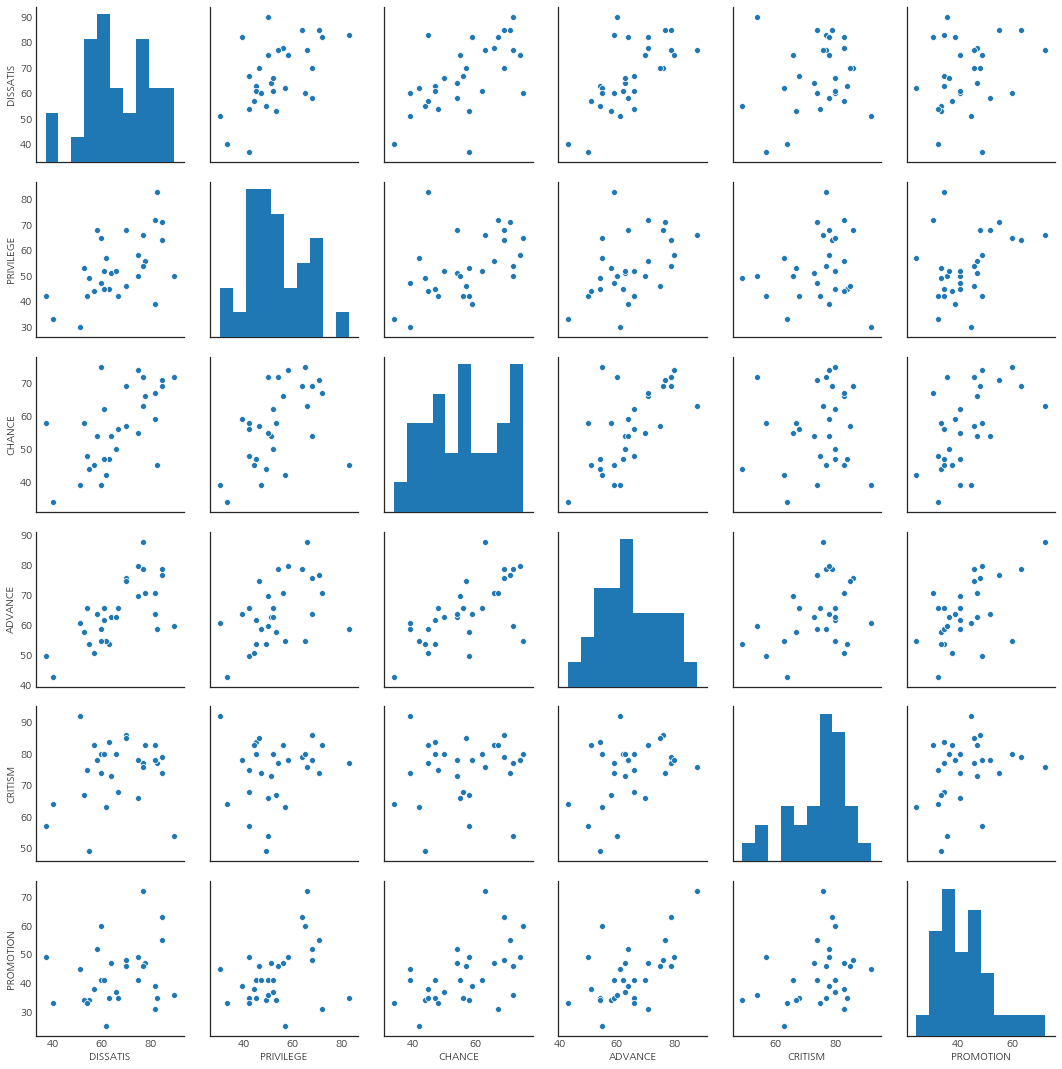

In [8]:
sns.pairplot(df_raw_x)

In [9]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


DISSATIS 는 CHANGE와 (0.597) ADVANCE와 (0.669) 상관계수가 높다.

CHANGE는 ADVANCE (0.640) 과도 상관계수가 높다. (-> 다중공선성)

## 3. 데이터 확인 및 Scaling

In [10]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [11]:
x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print('Scaled Data : \n{}'.format(nd_scaled[:5].round(3)))
print('Shape: \n{}'.format(nd_scaled.shape))

Scaled Data : 
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape: 
(30, 6)


In [12]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [13]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


## 4. 주성분 분석

In [14]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)

print('PCA Data : \n{}'.format(nd_pca[:5]))
print('Shape : \n{}'.format(nd_pca.shape))

PCA Data : 
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape : 
(30, 6)


In [15]:
#주성분 분석 및 결과 : 주성분 점수

df_pca = pd.DataFrame(nd_pca, columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [16]:
#주성분 분석 및 결과 : 고유값 확인 및 주성분 개수 결정

df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [I for I in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueFatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueFatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


적정 주성분 선택

: 상관계수 기준 (고유값 > 1) 2개

: 공분산 기준 (고유값 누적비율 > 0.8) 3개

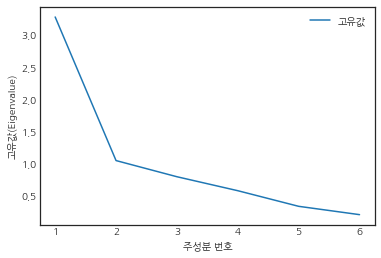

In [17]:
#주성분 분석 및 결과 : Scree Plot 확인 및 주성분 개수 결정

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

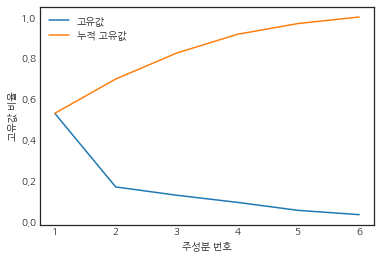

In [18]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueFatio'], label='고유값')
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label='누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [20]:
#주성분 분석 및 결과 : 고유 벡터 확인 및 해석
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                           columns = ['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


1주성분은 배움 기회와 승진 간의 양의 연관성이 있다.

2주성분은 불만처리와 특권 허용 간의 음의 연관성을 확인할 수 있다.

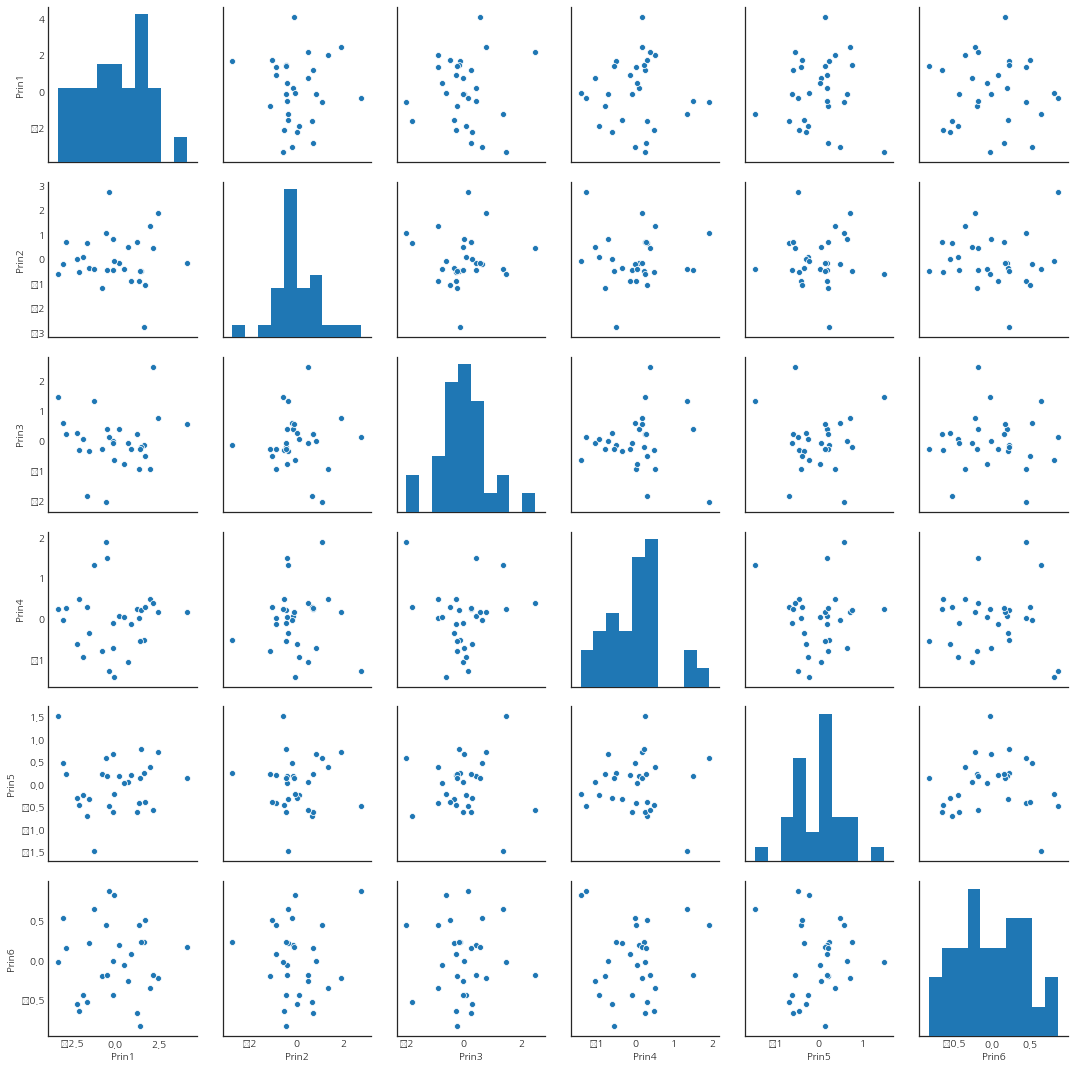

In [21]:
sns.pairplot(df_pca)

In [22]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


주성분은 서로 독립
## 5. 주성분 상관/회귀 분석 : 회귀분석

In [23]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model = sm.OLS(df_raw_y, df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.24e-05
Time:                        10:40:24   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [24]:
x_var = ['Prin1','Prin2','Prin3']
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.02e-05
Time:                        10:41:35   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

전체 설명변수를 이용한 모델보다 3개의 주성분을 이용한 회귀모델의 설명력이 약 11% 저하된다.

(기여율이 약한 주성분 3개를 제외하여 설명력이 저하)

주성분 회귀분석의 회귀계수는 모두 유의하다

# [실습] 붓꽃의 품종 특성 데이터
꽃잎 및 꽃받침 길이와 넓이 자료를 이용해서 주성분 분석을 실시하고 결과를 해석하시오.
## 1. 데이터 구성하기

In [30]:
df_raw = pd.read_csv("/home/pirl/Downloads/data2/IRIS.csv")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
df_raw.shape

(150, 5)

In [34]:
df_raw_x = df_raw.drop('SPECIES', axis=1)
df_raw_y = df_raw['SPECIES']

## 2. 선형관계 확인 : 산점도 행렬, 상관계수

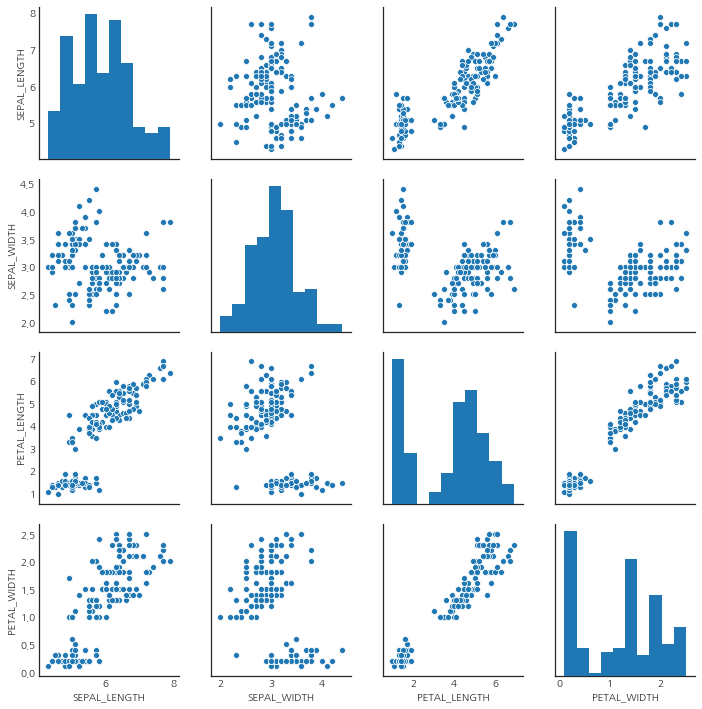

In [35]:
sns.pairplot(df_raw_x)

In [36]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [37]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [38]:
x_cols = df_raw_x.columns

scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)

print('Scaled Data : \n{}'.format(nd_scaled[:5].round(3)))
print('Shape: \n{}'.format(nd_scaled.shape))

Scaled Data : 
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape: 
(150, 4)


In [39]:
df_scaled = pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [40]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


## 3. 주성분 분석

In [41]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)

print('PCA Data : \n{}'.format(nd_pca[:5]))
print('Shape : \n{}'.format(nd_pca.shape))

PCA Data : 
[[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape : 
(150, 4)


In [42]:
#주성분 분석 및 결과 : 주성분 점수

df_pca = pd.DataFrame(nd_pca, columns = ['Prin1','Prin2','Prin3','Prin4'])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [43]:
#주성분 분석 및 결과 : 고유값 확인 및 주성분 개수 결정

df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [I for I in range(1,5)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueFatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueFatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


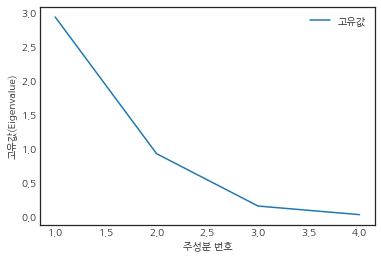

In [44]:
#주성분 분석 및 결과 : Scree Plot 확인 및 주성분 개수 결정

plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

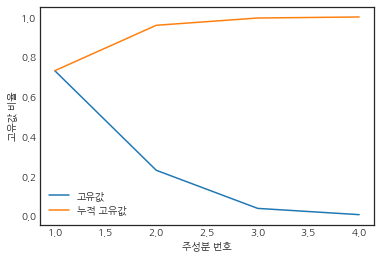

In [45]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueFatio'], label='고유값')
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label='누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [47]:
#주성분 분석 및 결과 : 고유 벡터 확인 및 해석
x_cols = pd.DataFrame({'Feature':df_raw_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T * -1, \
                           columns = ['Prin1','Prin2','Prin3','Prin4'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


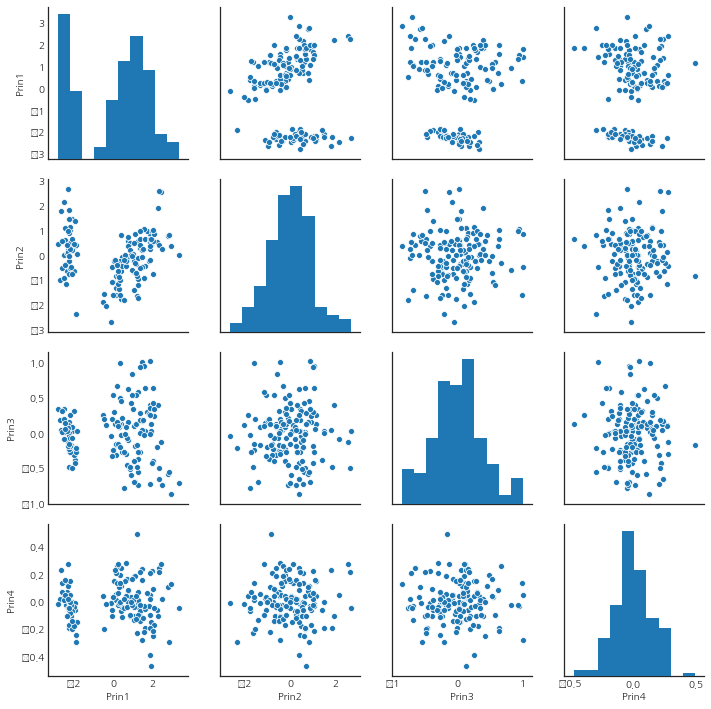

In [48]:
sns.pairplot(df_pca)

In [49]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0
